In [1]:
from functools import partial

import matplotlib.pyplot as plt
import numpy as np

from superfv import EulerSolver, plot_2d_slice
from superfv.initial_conditions import square

In [2]:
N = 8
p = 3
rho_min = 1e-8
NAD_rtol = 1e-2
NAD_atol = 0

ic = partial(square, bounds=(rho_min, 1), vx=2, vy=1, P=rho_min)

setup = dict(ic=ic, nx=N, ny=N, p=p)
aposteriori = dict(
    MOOD=True,
    MUSCL_limiter="PP2D",
    NAD_rtol=NAD_rtol,
    NAD_atol=NAD_atol,
    lazy_primitives="full",
)

In [3]:
print("O revisions")
sim_0_revision = EulerSolver(cascade="none", **setup, **aposteriori)
sim_0_revision.run(n=1, q_max=0, verbose=False)
print(f"\t # MOOD iters: {sim_0_revision.minisnapshots["nfine_MOOD_iters"][1][0]}")

print("1 revision")
sim_1_revision = EulerSolver(cascade="muscl1", **setup, **aposteriori)
sim_1_revision.run(n=1, q_max=0, verbose=False)
print(f"\t # MOOD iters: {sim_1_revision.minisnapshots["nfine_MOOD_iters"][1][0]}")

print("2 revisions")
sim_2_revision = EulerSolver(cascade="muscl1", max_MOOD_iters=2, **setup, **aposteriori)
sim_2_revision.run(n=1, q_max=0, verbose=False)
print(f"\t # MOOD iters: {sim_2_revision.minisnapshots["nfine_MOOD_iters"][1][0]}")

print("3 revisions")
sim_3_revision = EulerSolver(cascade="muscl1", max_MOOD_iters=3, **setup, **aposteriori)
sim_3_revision.run(n=1, q_max=0, verbose=False)
print(f"\t # MOOD iters: {sim_3_revision.minisnapshots["nfine_MOOD_iters"][1][0]}")

print("4 revisions")
sim_4_revision = EulerSolver(cascade="muscl1", max_MOOD_iters=4, **setup, **aposteriori)
sim_4_revision.run(n=1, q_max=0, verbose=False)
print(f"\t # MOOD iters: {sim_4_revision.minisnapshots["nfine_MOOD_iters"][1][0]}")

print("5 revisions")
sim_5_revision = EulerSolver(cascade="muscl1", max_MOOD_iters=5, **setup, **aposteriori)
sim_5_revision.run(n=1, q_max=0, verbose=False)
print(f"\t # MOOD iters: {sim_5_revision.minisnapshots["nfine_MOOD_iters"][1][0]}")

O revisions
	 # MOOD iters: 0
1 revision
	 # MOOD iters: 1
2 revisions
	 # MOOD iters: 2
3 revisions
	 # MOOD iters: 2
4 revisions
	 # MOOD iters: 2
5 revisions
	 # MOOD iters: 2


(<matplotlib.image.AxesImage at 0x1127a30b0>,
 <matplotlib.colorbar.Colorbar at 0x1127fdf10>)

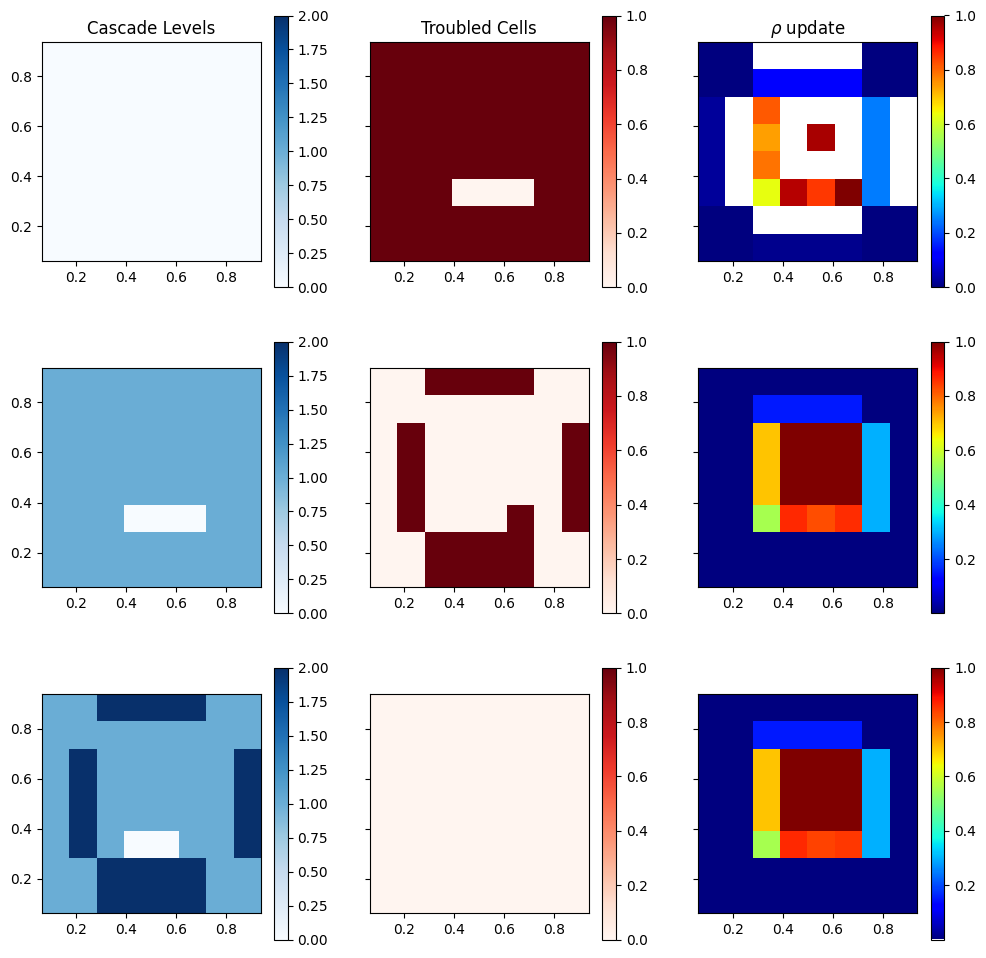

In [4]:
fig, axs = plt.subplots(3, 3, sharey=True, figsize=(12, 12))
axs[0, 0].set_title("Cascade Levels")
axs[0, 1].set_title("Troubled Cells")
axs[0, 2].set_title(r"$\rho$ update")

trouble_style = dict(
    variable="max",
    troubles=True,
    visualization=False,
    cmap="Reds",
    colorbar=True,
    vmin=0,
    vmax=1,
)
cascade_style = dict(variable="cascade", cmap="Blues", colorbar=True, vmin=0, vmax=2)
rho_style = dict(
    variable="rho",
    cell_averaged=True,
    cmap="jet",
    colorbar=True,
    func=lambda x: np.where(
        np.logical_or(
            x < rho_min - (NAD_rtol + NAD_atol), x > 1 + (NAD_rtol + NAD_atol)
        ),
        np.nan,
        x,
    ),
)

plot_2d_slice(sim_0_revision, axs[0, 1], **trouble_style)
plot_2d_slice(sim_0_revision, axs[0, 0], **cascade_style)
plot_2d_slice(sim_0_revision, axs[0, 2], **rho_style)

plot_2d_slice(sim_1_revision, axs[1, 1], **trouble_style)
plot_2d_slice(sim_1_revision, axs[1, 0], **cascade_style)
plot_2d_slice(sim_1_revision, axs[1, 2], **rho_style)

plot_2d_slice(sim_2_revision, axs[2, 1], **trouble_style)
plot_2d_slice(sim_2_revision, axs[2, 0], **cascade_style)
plot_2d_slice(sim_2_revision, axs[2, 2], **rho_style)

In [5]:
fig.savefig("../trouble_cascade_visualization.png", dpi=300)